# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [109]:
import pandas as pd
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

In [110]:
# Step 1: Filter Out Irrelevant Columns

# Display data, and examine irrelevant columns
import pandas as pd
df_merkur = pd.read_excel(r"merkur.xlsx")
df_merkur

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


In [111]:
# Remove column Waterworks as It acts as an identifier for each water treatment plant but does not provide any features.

# Drop column Waterworks
df_merkur = df.drop(columns="WaterworksName")
df_merkur


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,15.217089,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,28.970630,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,NaN,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,60.686602,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,19.339643,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,25.079249,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


In [112]:
#Step 2 handle several columns contain missing values (NaNs). 

# Find out how large a percentage each column is missing

# Calculate the percentage of missing values for each column
missing_values_percentage = df_merkur.isna().mean() * 100

# Filter only columns with missing values and sort them in descending order
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False)

# Display the result
missing_values_percentage




UniformityCoefficient        64.556962
TotalEBCT                    49.367089
SumOfld_layer                49.367089
AverageFilterBedVolume       43.037975
OverallFilterGrainSizeMin    43.037975
OverallFilterGrainSizeMax    43.037975
AverageTotalFilterDepth      41.772152
TankExploitation             37.974684
HLR_BW                       34.177215
Stage1HLR                    26.582278
MaxTypicalFlow               20.253165
FilterExploitation           20.253165
BW%                          16.455696
AverageBackwashVolume        12.658228
UFRV                          8.860759
Footprint                     5.063291
AverageFilterArea             5.063291
TankCapacity                  5.063291
AverageTypicalRunVolume       2.531646
dtype: float64

In [113]:
# 7 columns contain high percentages of missing values > 40 % . Its best to drop them as imputing over 40% can introduce substantial noise.
# Lets first assess the importance of these high-missing-value columns, because dropping them could cause a loss of valuable features if they are important.

# We will use the correlation between the columns to determine the importance of the high-missing-value columns.

# Identify columns with over 40% missing values
high_missing_cols = missing_values_percentage[missing_values_percentage > 40].index.tolist()

# Select only numeric columns for correlation calculation
numeric_data = df_merkur.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Extract correlations of high-missing-value columns with all other columns
correlations_with_high_missing = correlation_matrix[high_missing_cols].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Display correlations to check for significant associations
correlations_with_high_missing




,UniformityCoefficient,TotalEBCT,SumOfld_layer,AverageFilterBedVolume,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageTotalFilterDepth
TotalFilters,0.030328,0.020812,-0.263500,0.221944,-0.170065,0.345564,-0.262775
MaxTypicalFlow,-0.132705,-0.232077,-0.060331,0.478564,-0.207170,0.396241,-0.067009
AverageFilterArea,-0.185622,0.116159,-0.365816,0.838379,-0.020648,0.553076,-0.129803
AverageTypicalRunVolume,-0.051108,0.172174,0.204352,0.330404,-0.116749,0.102424,0.195490
AverageBackwashVolume,-0.135785,-0.089324,-0.261793,0.650829,0.090452,0.253064,-0.010790
AverageTotalFilterDepth,-0.190964,0.048783,0.742106,0.375994,-0.052568,-0.277205,1.000000
OverallFilterGrainSizeMin,0.849492,0.062184,-0.295665,0.046558,1.000000,-0.051403,-0.052568
OverallFilterGrainSizeMax,-0.083584,-0.037665,-0.349217,0.348548,-0.051403,1.000000,-0.277205
AverageFilterBedVolume,-0.263815,0.195102,-0.013015,1.000000,0.046558,0.348548,0.375994
FilterExploitation,-0.314553,0.554612,-0.169712,0.189812,-0.205781,0.339592,-0.188286


In [114]:
# The high-missing-value (Over 40%) columns have significant correlations with other features that have lower percentages of missing values.
# The strong correlations confirms that the high-missing-value columns do not provide much unique information that isn't already captured

# Example
# Since UniformityCoefficient is highly correlated with OverallFilterGrainSizeMin, which has the same percentage of missing values, and both are correlated with TankCapacity (which has fewer missing values), 
# the information from UniformityCoefficient could be redundant, and we can drop it.

# Given above analysis, we decied to proceed with dropping the high-missing-value columns, as it will have minimal impact on performance due to redundancy.

# Drop columns with over 40% missing values
df_merkur = df_merkur.drop(columns=high_missing_cols)
df_merkur


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,57.886530,Cascade,1.880000,1.388889,143.341204,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,63.521586,Air injection,1.620000,11.204508,16.714412,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,64.908486,Bottom aeration,2.213333,3.935020,44.693822,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,Cascade,2.073333,NaN,194.588021,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,Cascade,1.313333,NaN,412.300024,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,91.698648,Cascade,1.546667,5.242647,24.106636,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,89.405620,Passive plate aerator,2.133333,6.912876,22.050800,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,19.331598,Bottom aeration,1.673333,2.824380,209.076387,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,Cascade,2.200000,NaN,152.513970,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


In [115]:
# Step 3: Handle columns with missing values less than 40%


# Separate numeric and categorical columns
numeric_columns = df_merkur.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_merkur.select_dtypes(include=['object']).columns

# Impute numeric columns with the median value
df_merkur[numeric_columns] = df_merkur[numeric_columns].fillna(df_merkur[numeric_columns].median())

# Impute categorical columns with the mode (most frequent value)
df_merkur[categorical_columns] = df_merkur[categorical_columns].fillna(df_merkur[categorical_columns].mode().iloc[0])

# Display the first few rows to confirm imputation
df_merkur.head()

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.0,6.000000,5200.0,10.0,Time,57.886530,Cascade,1.880000,1.388889,143.341204,866.666667,0.414525,30.889453,27.294778,19.402985,Gravity,Single,253543
1,4,110.0,4.908739,300.0,28.0,Volume,63.521586,Air injection,1.620000,11.204508,16.714412,40.743665,23.000062,30.557749,2.576075,19.402985,Pressure,Double,612094
2,4,120.0,15.343900,3800.0,83.3,Volume,64.908486,Bottom aeration,2.213333,3.935020,44.693822,249.217919,2.192086,32.791831,21.825600,19.402985,Gravity,Double,682318
3,2,120.0,16.000000,1200.0,26.0,Volume,63.279585,Cascade,2.073333,3.742502,194.588021,75.000000,2.166907,30.889453,12.554300,19.402985,Gravity,Single,156998
4,2,120.0,1.495000,250.0,4.5,Volume,63.279585,Cascade,1.313333,3.742502,412.300024,167.224093,1.818182,30.889453,52.220566,19.402985,Gravity,Single,6710


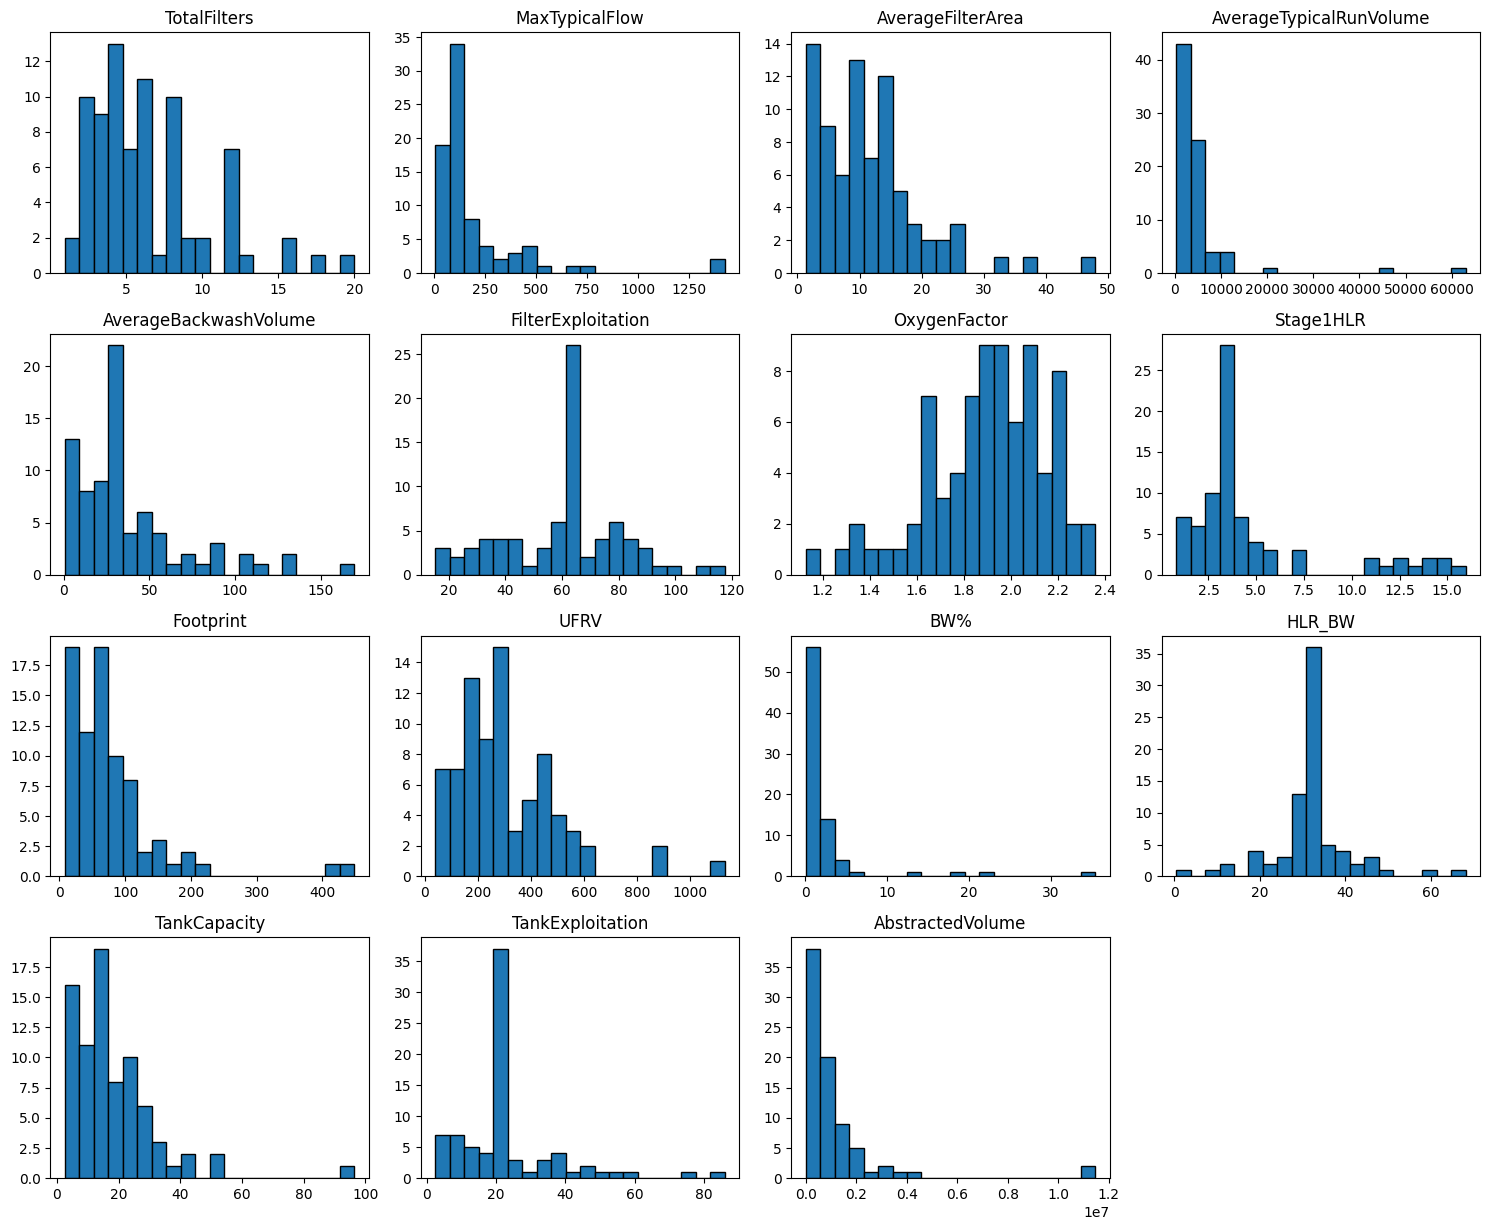

In [116]:
# Step 4: Scaling numeric data.


# First lets inspecting each feature's distribution to determine if scaling is necessary, and if so, which scaling method to use.


import matplotlib.pyplot as plt

# Plot histograms for each numeric column to inspect their distributions
num_cols = df_merkur[numeric_columns].columns

# Setting up the layout for the subplots
plt.figure(figsize=(15, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 4, i)  # Adjusted to fit all columns
    plt.hist(df_merkur[col], bins=20, edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.show()


In [117]:
# Features such as MaxTypicalFlow, AverageFilterArea, AverageTypicalRunVolume, Footprint, UFRV, TankCapacity, and AbstractedVolume, show right-skewed distributions.
# Some columns, like FilterExploitation and OxygenFactor, are more centered and close to a normal distribution.

# Since many of our features have right-skewed distributions, and most values are close to the lower range, 
# we decided to go with min-max scaling as it compresses the scale, making the differences clearer in a model.
# It ensures that the largest and smallest values are well-represented in a bounded range, which is helpful in cases of above results.


# Apply Min-Max scaling to numeric columns
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df_merkur[numeric_columns] = min_max_scaler.fit_transform(df_merkur[numeric_columns])

df_merkur.head()

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,0.263158,0.030645,0.100245,0.078884,0.054519,Time,0.416917,Cascade,0.610390,0.038377,0.306610,0.758179,0.009651,0.450317,0.263365,0.202788,Gravity,Single,0.021561
1,0.157895,0.072913,0.076834,0.000797,0.161185,Volume,0.472130,Air injection,0.399351,0.686409,0.018993,0.000000,0.649245,0.445406,0.000000,0.202788,Pressure,Double,0.052881
2,0.157895,0.079958,0.300703,0.056574,0.488889,Volume,0.485718,Bottom aeration,0.880952,0.206473,0.082545,0.191375,0.059990,0.478478,0.205094,0.202788,Gravity,Double,0.059015
3,0.052632,0.079958,0.314779,0.015139,0.149333,Volume,0.469758,Cascade,0.767316,0.193763,0.423011,0.031447,0.059277,0.450317,0.106313,0.202788,Gravity,Single,0.013128
4,0.052632,0.079958,0.003597,0.000000,0.021926,Volume,0.469758,Cascade,0.150433,0.193763,0.917517,0.116106,0.049401,0.450317,0.528936,0.202788,Gravity,Single,0.000000


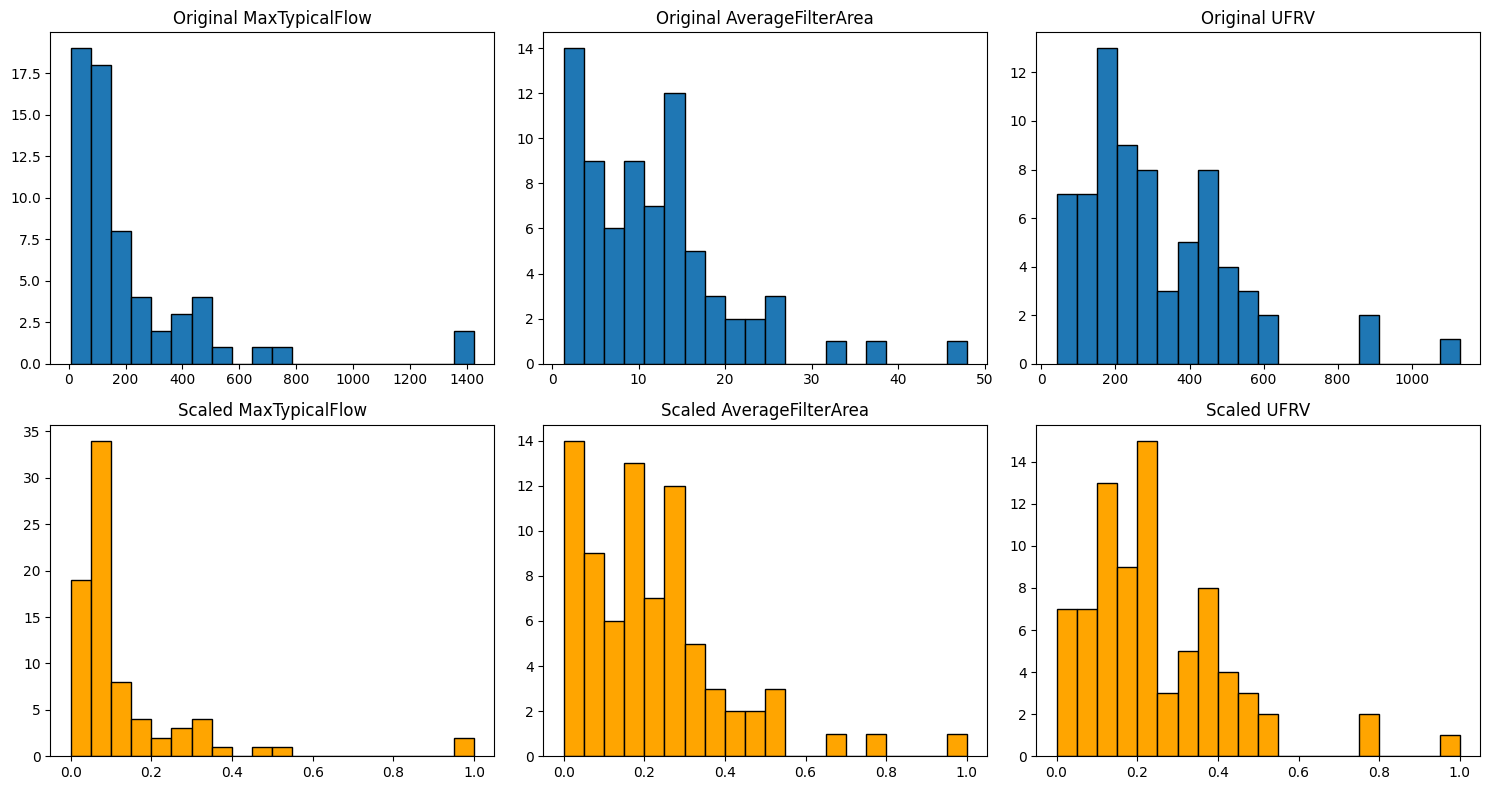

In [118]:
# Visualize the effect of scaling


# Before scaling
original_data_sample = df[numeric_columns].copy()

# Plot the before and after scaling for some columns
sample_columns = ['MaxTypicalFlow', 'AverageFilterArea', 'UFRV']

plt.figure(figsize=(15, 8))
for i, col in enumerate(sample_columns, 1):
    # Original Data Histogram
    plt.subplot(2, len(sample_columns), i)
    plt.hist(original_data_sample[col], bins=20, edgecolor='black')
    plt.title(f'Original {col}')
    
    # Scaled Data Histogram
    plt.subplot(2, len(sample_columns), i + len(sample_columns))
    plt.hist(df_merkur[col], bins=20, edgecolor='black', color='orange')
    plt.title(f'Scaled {col}')

plt.tight_layout()
plt.show()


In [119]:
# MaxTypicalFlow and AverageFilterArea: Originally had broader ranges and right-skewed distributions. After scaling, their values are compressed into the 0–1 range
# UFRV: Originally had a wide spread with a few higher values. After scaling, it also fits within 0–1, with the distribution shape preserved but the values bounded.

In [120]:
# Step 5: Encoding of Categorical Columns

# Check the unique values in each categorical column to determine the encoding method to use
for col in categorical_columns:
    print(f'{col}: {df_merkur[col].unique()}')

    

PrimaryTrigger: ['Time' 'Volume' 'Waterlevel above filter' 'Mix']
AerationType: ['Cascade' 'Air injection' 'Bottom aeration' 'Pure oxygen injection'
 'Passive plate aerator' 'No primary aeration' 'Other' 'Inka']
GravityPressureMixed: ['Gravity' 'Pressure' 'Mixed']
Stages: ['Single' 'Double' 'Mixed' 'Triple']


In [121]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# We will proceed with one-hot encoding for PrimaryTrigger, AerationType, and GravityPressureMixed since they have multiple unique values and no ordinal relationship.
df_merkur = pd.get_dummies(df_merkur, columns=['PrimaryTrigger', 'AerationType', 'GravityPressureMixed'], drop_first=True)


# Stages column has an ordinal relationship(progression), so we will use label encoding for it.
# Label Encoding for 'Stages' (assuming potential ordinal relationship)
label_encoder = LabelEncoder()
df_merkur['Stages'] = label_encoder.fit_transform(df_merkur['Stages'])



# Check data type of Stages
print("Data type of 'Stages':", df_merkur['Stages'].dtype)

# Display unique values in Stages
print("Unique values in 'Stages':", df_merkur['Stages'].unique())


df_merkur.head()




Data type of 'Stages': int64
Unique values in 'Stages': [2 0 1 3]


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,...,PrimaryTrigger_Waterlevel above filter,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
0,0.263158,0.030645,0.100245,0.078884,0.054519,0.416917,0.610390,0.038377,0.306610,0.758179,...,False,False,True,False,False,False,False,False,False,False
1,0.157895,0.072913,0.076834,0.000797,0.161185,0.472130,0.399351,0.686409,0.018993,0.000000,...,False,False,False,False,False,False,False,False,False,True
2,0.157895,0.079958,0.300703,0.056574,0.488889,0.485718,0.880952,0.206473,0.082545,0.191375,...,False,True,False,False,False,False,False,False,False,False
3,0.052632,0.079958,0.314779,0.015139,0.149333,0.469758,0.767316,0.193763,0.423011,0.031447,...,False,False,True,False,False,False,False,False,False,False
4,0.052632,0.079958,0.003597,0.000000,0.021926,0.469758,0.150433,0.193763,0.917517,0.116106,...,False,False,True,False,False,False,False,False,False,False


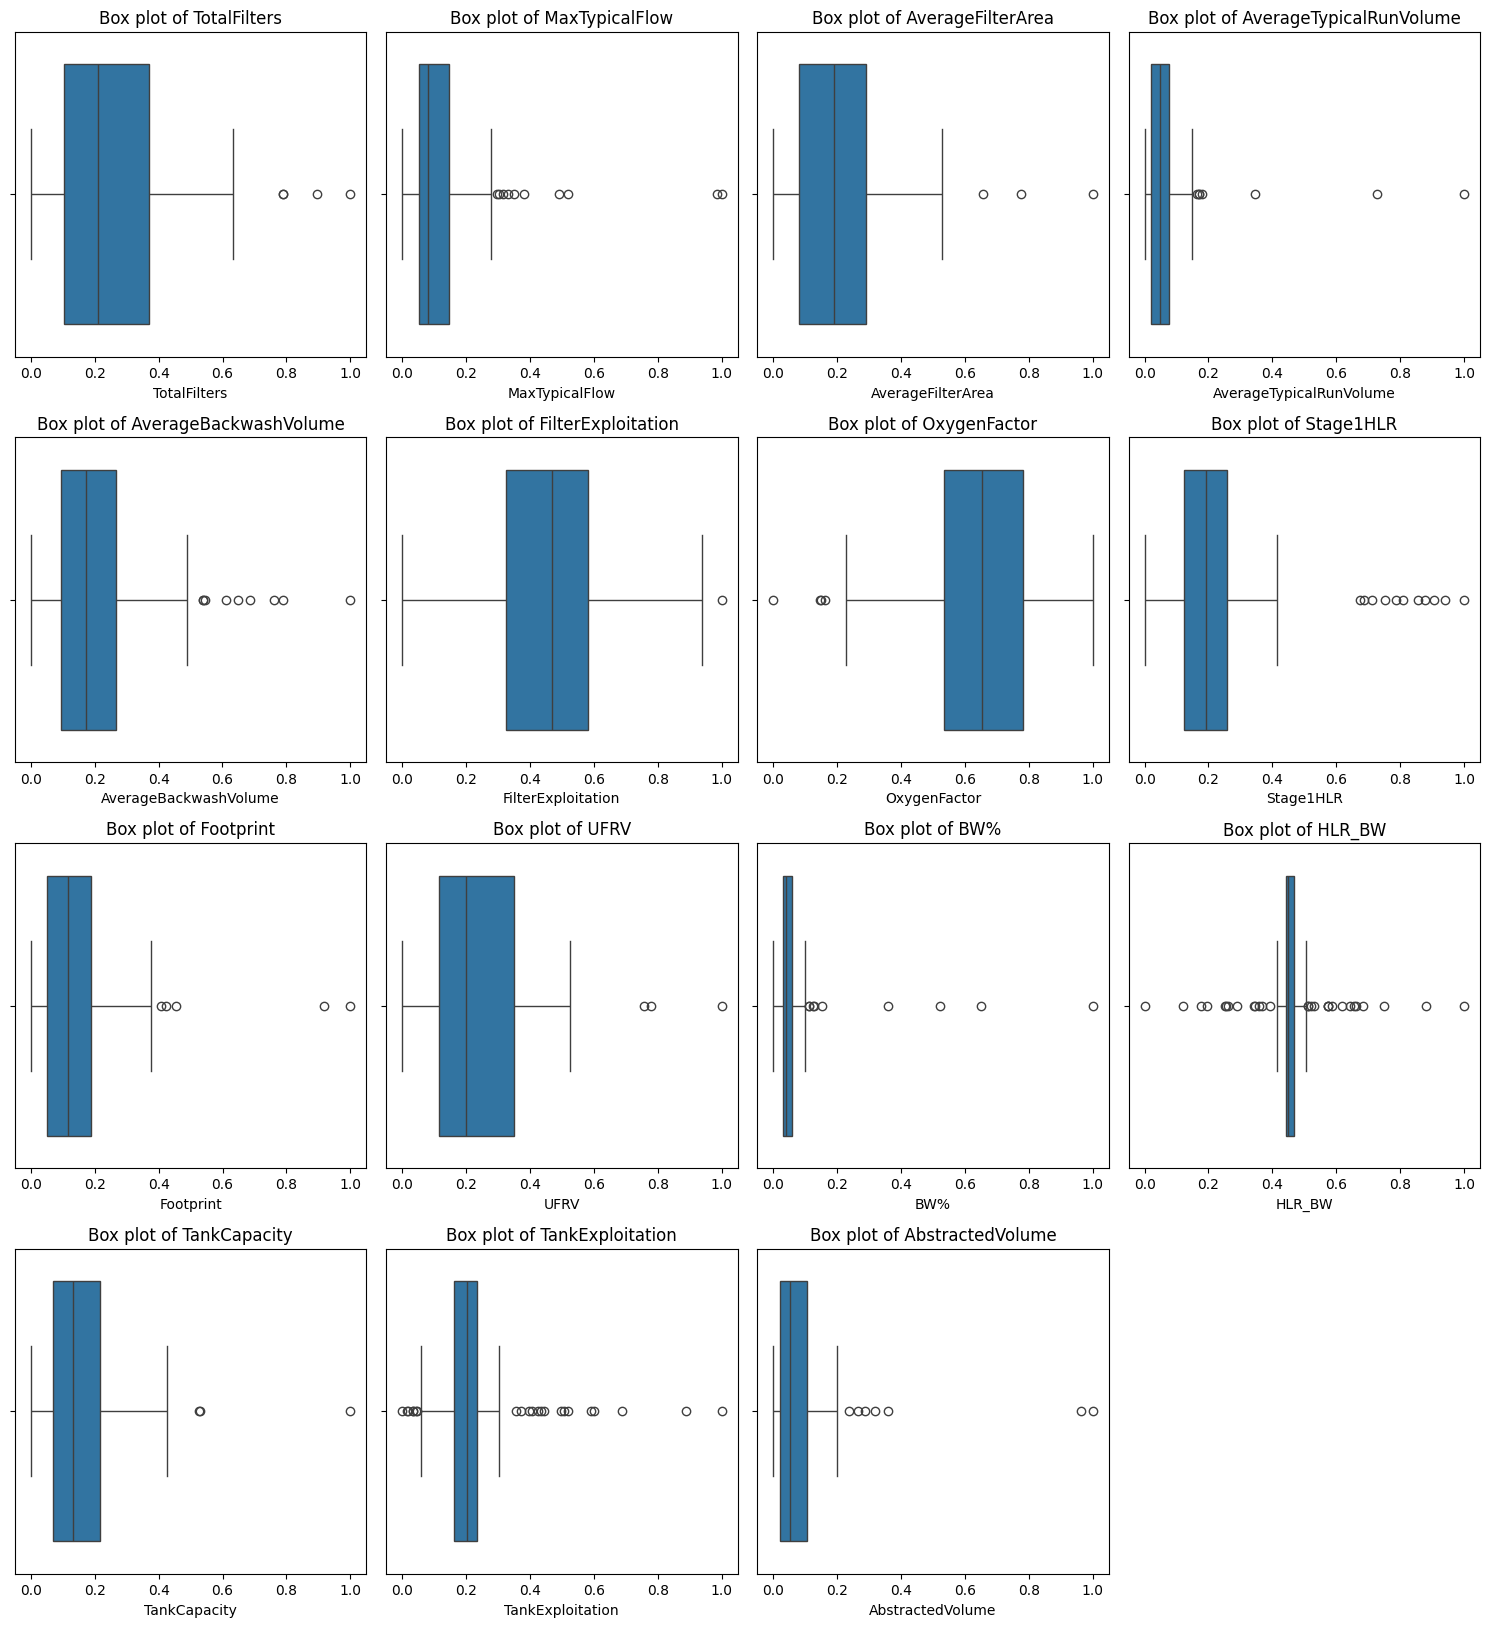

In [122]:
##Step 6 - Visulize outlies to determine if they should be removed

import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots for each numeric column to visualize outliers
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 4, i)  # Adjust the layout to fit all plots
    sns.boxplot(data=df_merkur, x=col)
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()


In [123]:
#MaxTypicalFlow, AverageFilterArea, AverageTypicalRunVolume: These show multiple points beyond the upper whisker, indicating high-value outliers.
#Footprint, UFRV, BW%, HLR_BW, AbstractedVolume: There are clear outliers on both the high and low ends.


# Since we have a very small dataset (80 rows), removing too many outliers could significantly reduce the data available for analysis, we decided to keep the outliers for now and use capping 
# to limit their impact on the model.

# Capping outliers in each numeric column by using the 1st and 99th percentiles
for col in numeric_columns:
    lower_bound = df_merkur[col].quantile(0.01)
    upper_bound = df_merkur[col].quantile(0.99)
    df_merkur[col] = df_merkur[col].clip(lower=lower_bound, upper=upper_bound)

# Display the first few rows to confirm that the outliers have been capped
df_merkur.head()

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,...,PrimaryTrigger_Waterlevel above filter,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
0,0.263158,0.030645,0.100245,0.078884,0.054519,0.416917,0.610390,0.038377,0.306610,0.758179,...,False,False,True,False,False,False,False,False,False,False
1,0.157895,0.072913,0.076834,0.000797,0.161185,0.472130,0.399351,0.686409,0.018993,0.009611,...,False,False,False,False,False,False,False,False,False,True
2,0.157895,0.079958,0.300703,0.056574,0.488889,0.485718,0.880952,0.206473,0.082545,0.191375,...,False,True,False,False,False,False,False,False,False,False
3,0.052632,0.079958,0.314779,0.015139,0.149333,0.469758,0.767316,0.193763,0.423011,0.031447,...,False,False,True,False,False,False,False,False,False,False
4,0.052632,0.079958,0.003597,0.000622,0.021926,0.469758,0.150433,0.193763,0.917517,0.116106,...,False,False,True,False,False,False,False,False,False,False


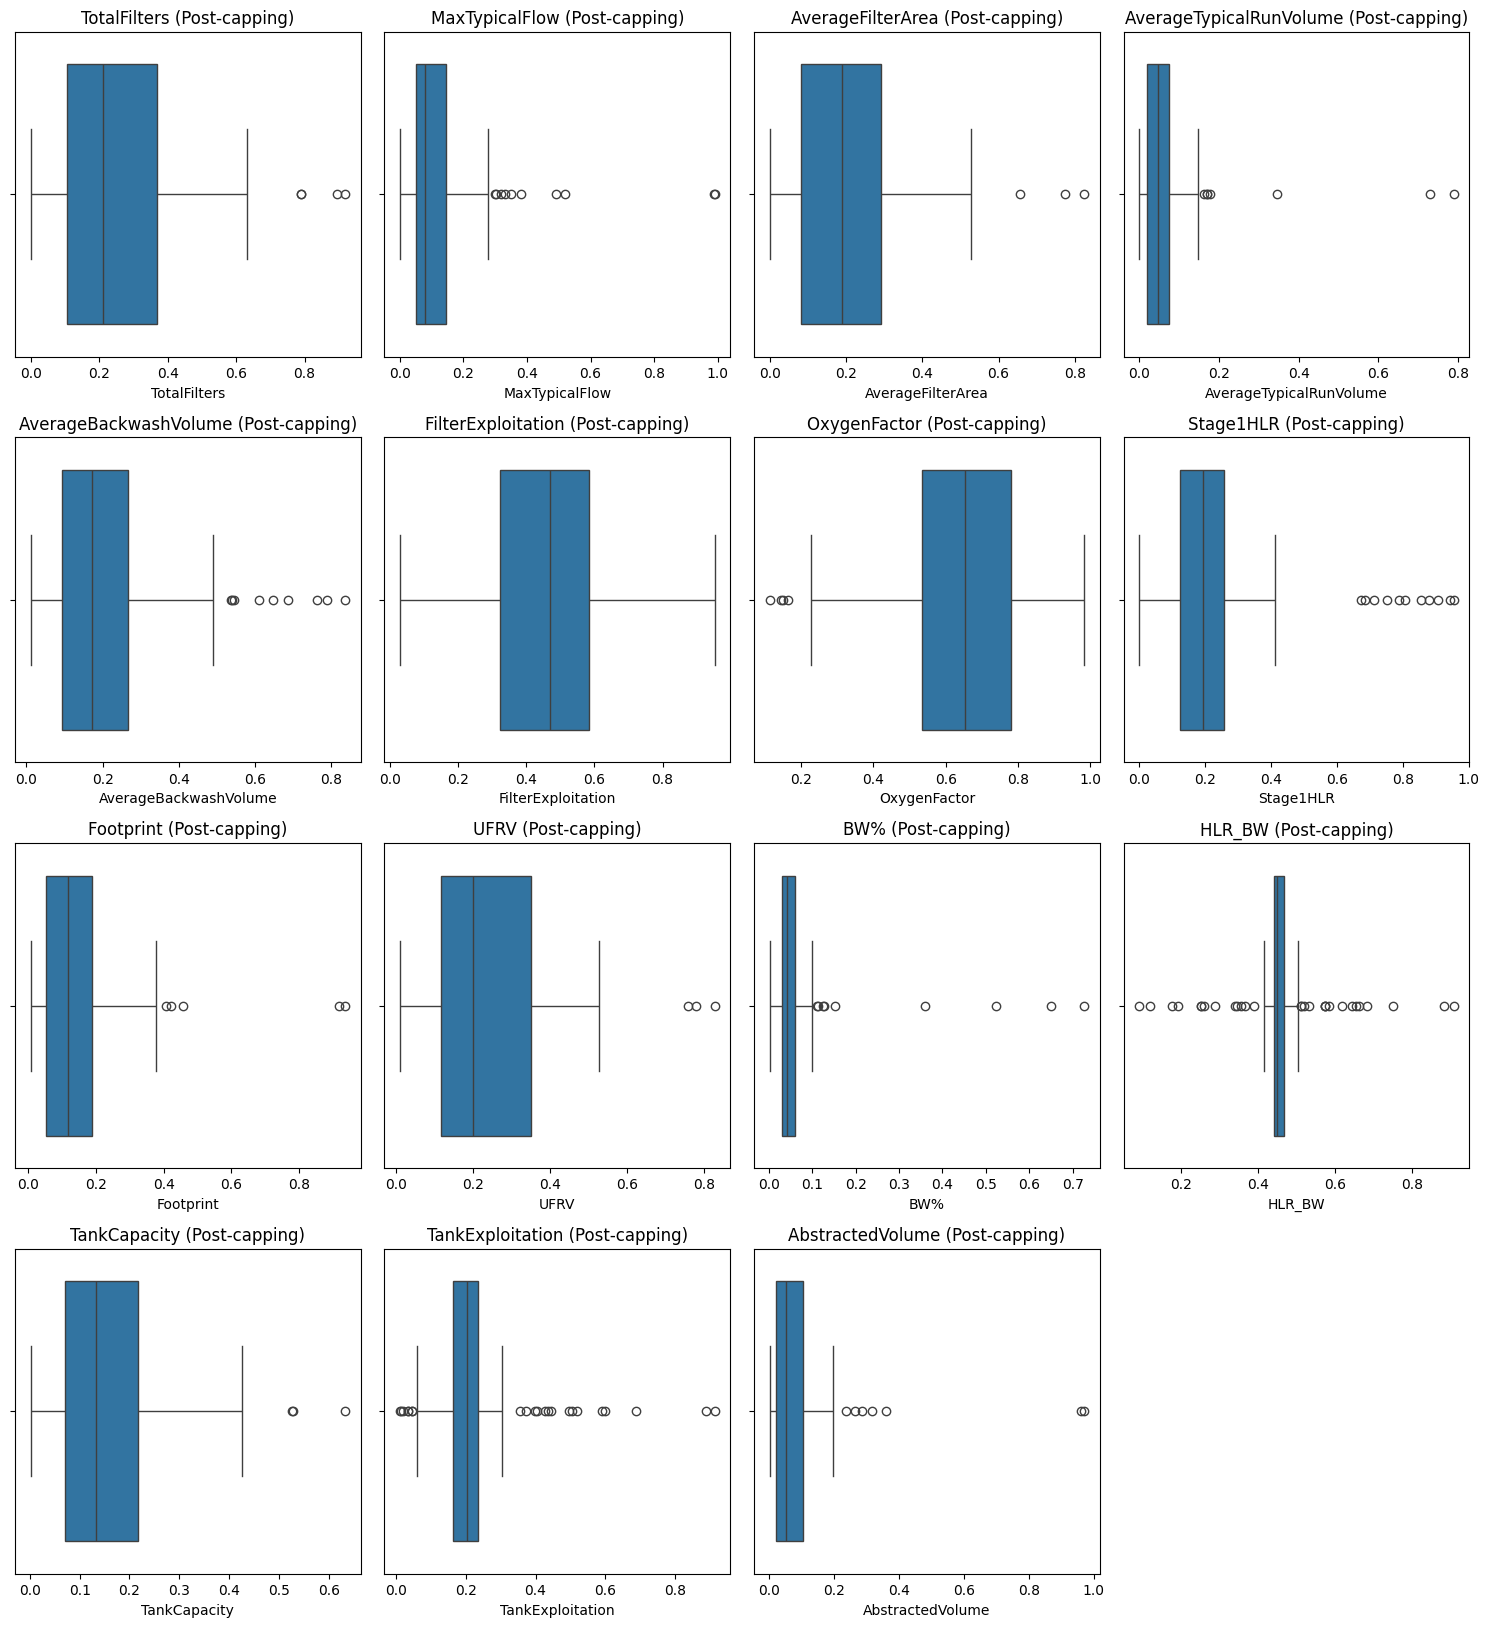

In [126]:
# Visualize the data post-outlier capping.

# Visualize box plots for each numeric column after outlier capping to inspect changes
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 4, i)  # Adjust layout to fit all plots
    sns.boxplot(data=df_merkur, x=col)
    plt.title(f'{col} (Post-capping)')

plt.tight_layout()
plt.show()

In [ ]:
# The outliers are now a bit closer to the main body of the data.

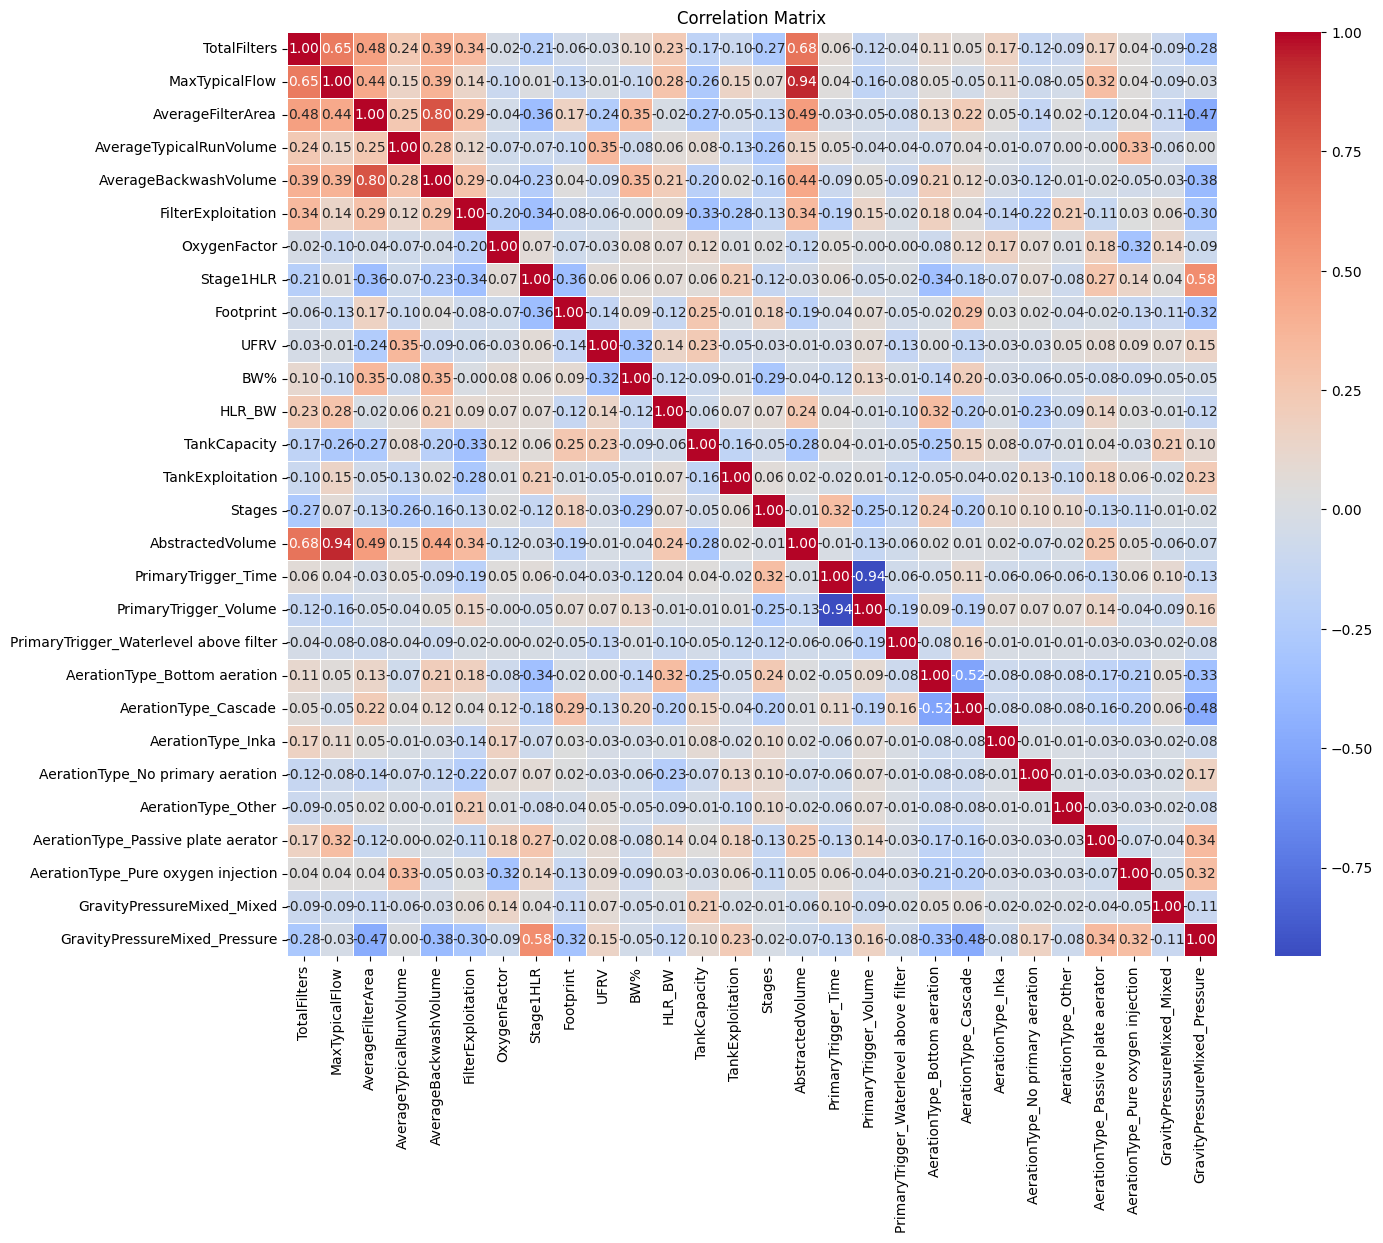

In [127]:
# Step 7: Generate a correlation matrix to examine relationships between features

correlation_matrix = df_merkur.corr()

# Display the correlation matrix using a heatmap for better visualization
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [128]:
# AbstractedVolume and MaxTypicalFlow show a high correlation of 0.94. Indicating that the amount of water abstracted is closely linked to the maximum flow capacity.  
# Makes sense because larger water treatment plants would likely be built with a higher maximum flow capacity to match their processing volume.

# Lets drop AbstractedVolume.

# Removing the 'AbstractedVolume' column due to high correlation with 'MaxTypicalFlow'
df_merkur = df_merkur.drop(columns=['AbstractedVolume'])

# Display the first few rows to confirm removal
df_merkur.head()

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,...,PrimaryTrigger_Waterlevel above filter,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
0,0.263158,0.030645,0.100245,0.078884,0.054519,0.416917,0.610390,0.038377,0.306610,0.758179,...,False,False,True,False,False,False,False,False,False,False
1,0.157895,0.072913,0.076834,0.000797,0.161185,0.472130,0.399351,0.686409,0.018993,0.009611,...,False,False,False,False,False,False,False,False,False,True
2,0.157895,0.079958,0.300703,0.056574,0.488889,0.485718,0.880952,0.206473,0.082545,0.191375,...,False,True,False,False,False,False,False,False,False,False
3,0.052632,0.079958,0.314779,0.015139,0.149333,0.469758,0.767316,0.193763,0.423011,0.031447,...,False,False,True,False,False,False,False,False,False,False
4,0.052632,0.079958,0.003597,0.000622,0.021926,0.469758,0.150433,0.193763,0.917517,0.116106,...,False,False,True,False,False,False,False,False,False,False
